<a href="https://colab.research.google.com/github/OvinduWijethunge/Machine_Learning_Projects/blob/version-1/youtube%20spam%20classifier/Logistic_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#df = pd.read_csv('model.csv')
url = 'https://raw.githubusercontent.com/OvinduWijethunge/Machine_Learning_Projects/master/youtube%20spam%20classifier/model.csv'
df = pd.read_csv(url)

In [88]:
df.head()

,Unnamed: 0,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,0,0.265993,0.239773,1.402189,0.000000,1,3.137146,0.0,0,0.0,39.978929,0.200000,0,0,0,0.0,0
1,1,0.327118,0.222346,2.769147,0.000000,1,4.905188,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0
2,2,0.433986,0.309582,3.532625,0.032258,1,5.719015,0.0,0,0.0,39.978929,0.064516,0,0,0,0.0,0
3,3,0.201988,0.181141,1.818371,0.000000,1,3.770442,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0
4,4,0.176259,0.125743,1.402189,0.000000,1,3.011349,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0


In [89]:
df.isnull().sum()

Unnamed: 0              0
sim_content             0
sim_comment             0
word_count              0
duplicate_word_ratio    0
no_of_sentences         0
length_of_comment       0
num_of_punctuations     0
is_period_sequence      0
stop_word_ratio         0
post_coment_gap         0
black_word_count        0
is_link                 0
is_youtube_link         0
is_number               0
comment_duplication     0
is_spam                 0
dtype: int64

In [90]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication', 'is_spam'],
      dtype='object')

#### Standerdization is not required for logistic regression

In [91]:
dfc = df.copy()

In [92]:
y = dfc['is_spam']
X = dfc.drop(['is_spam','id'],axis=1)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Handle imbalnce dataset

In [94]:
dfc['is_spam'].value_counts()

0    9823
1     812
Name: is_spam, dtype: int64

In [95]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(1)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

X_train = X_train_os
y_train = y_train_os

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 6891, 1: 553})
The number of classes after fit Counter({0: 6832, 1: 6832})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Hyperparameter Tuninng

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lr = LogisticRegression()

In [98]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [99]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet','none']
c_values = [100, 10, 1.0, 0.1, 0.01,0.001,0.0001]
dual = [True,False]
fit_intercept = [True,False]
warm_start = [True,False]

In [100]:
grid = dict(solver=solvers,penalty=penalty,C=c_values,dual=dual,fit_intercept=fit_intercept,warm_start=warm_start)

In [101]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True) 

In [102]:
from sklearn.model_selection import RandomizedSearchCV
lr_random = RandomizedSearchCV(estimator=lr, param_distributions=grid, n_jobs=-1,n_iter = 100, cv=cv, scoring='accuracy',error_score=0,return_train_score=True,verbose=2)

In [103]:
lr_random.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 897 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   57.5s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=0,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='dep...', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01, 0.001,
                                              0.0001],
                                        'dual': [True, False],
             

### Evaluate

In [104]:
lr_random.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=True)

In [105]:
lr_random.best_score_

0.8985655928650763

In [106]:
lr_random.best_params_

{'C': 100,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'liblinear',
 'warm_start': True}

In [107]:
# To get the best model
best_model = lr_random.best_estimator_

In [108]:
y_pred = best_model.predict(X_test)

In [109]:
err = (y_pred - y_test)

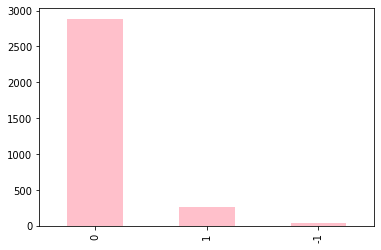

In [110]:
err.value_counts().plot(kind='bar',color='pink')

In [111]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.09526794108429959
MSE: 0.09526794108429959
RMSE: 0.3086550519338694


In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2673  259]
 [  45  214]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      2932
           1       0.45      0.83      0.58       259

    accuracy                           0.90      3191
   macro avg       0.72      0.87      0.77      3191
weighted avg       0.94      0.90      0.92      3191



In [113]:
cof = lr_random.best_estimator_.coef_.tolist()

In [125]:
arr=cof[0]
x_ax = [abs(x) for x in arr]

In [126]:
x_ax

[2.6830015702012195,
 12.172553335735461,
 3.889151675943372,
 4.537464382415374,
 0.17695921752614752,
 4.382454098788429,
 0.15740080062815712,
 0.9179721695433453,
 3.2747555815968132,
 0.004070913453360201,
 21.898109044920815,
 3.935292768235432,
 0.6985784212911996,
 3.5379682709481064,
 6.927058332540896]

In [115]:
y_ax = ['sim_content', 'sin_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


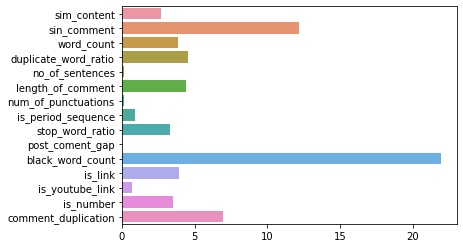

In [116]:
sns.barplot(x_ax,y_ax,orient = 'h')
#plt.xticks(rotation=90)
plt.show()

In [117]:
intercept = lr_random.best_estimator_.intercept_

In [118]:
intercept

array([-10.21150224])

In [119]:
# best score is  0.8450704225352113

In [120]:
# get the best model in to instance (for save in disk)
best_model = lr_random.best_estimator_ 

In [121]:
# for save the model if you want
#import pickle
# open a file, where you ant to store the data
#file = open('random_forest_regression_model_v2.pkl', 'wb')
# dump information to that file
#pickle.dump(rf_random, file)

### ROC 

In [122]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [123]:
baseline_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

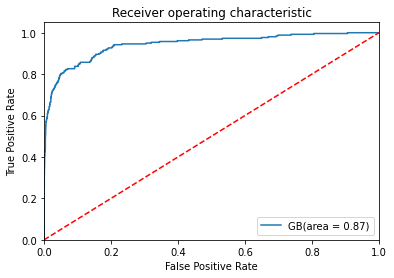

In [124]:
plt.figure()
plt.plot(fprB, tprB, label='GB(area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Recall - presicion with threshold values**

(0.0, 1.0)

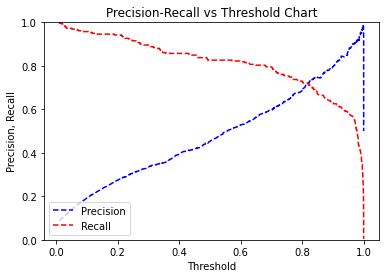

In [127]:
### Predict test_y values and probabilities based on random forest model
probs_y=best_model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [128]:
import pickle
#open a file, where you ant to store the data
file = open('logistic_Regression.pkl', 'wb')
# dump information to that file
pickle.dump(best_model, file)